# Final Project_Supplementary Documentation (Rev1)
## This file contains detailed analysis results to anwer questions for this project.
## Submission code, "poi_id.py", was created based on this document.
# Task 1: Feature selection

In [1]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

features_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus',
                 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses',
                 'exercised_stock_options', 'long_term_incentive', 'restricted_stock', 'director_fees',
                 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']

# Storing original list for later comparison
features_list_original = ['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus',
                 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses',
                 'exercised_stock_options', 'long_term_incentive', 'restricted_stock', 'director_fees',
                 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']


### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

print ('Total number of data points: {:d}'.format(len(data_dict)))  # Total number of data points

# Number of POIs
num_of_pois = 0

for name in data_dict:
    if data_dict[name]['poi'] == True:
        num_of_pois += 1

print ('Number of POIs: {:d}'.format(num_of_pois))

Total number of data points: 146
Number of POIs: 18


# Task 2: Remove outliers

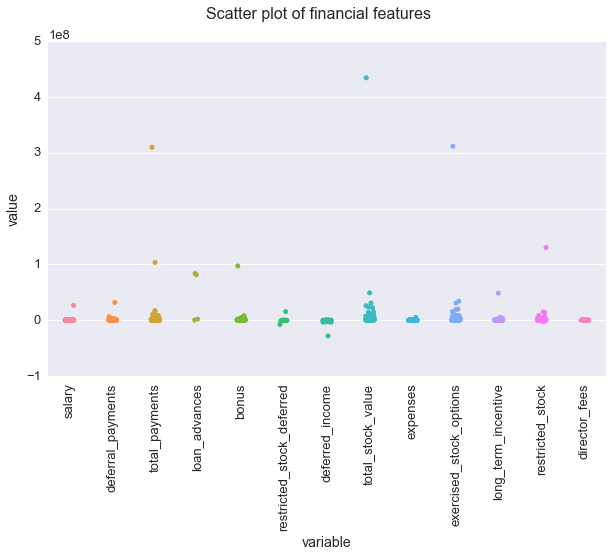

TOTAL


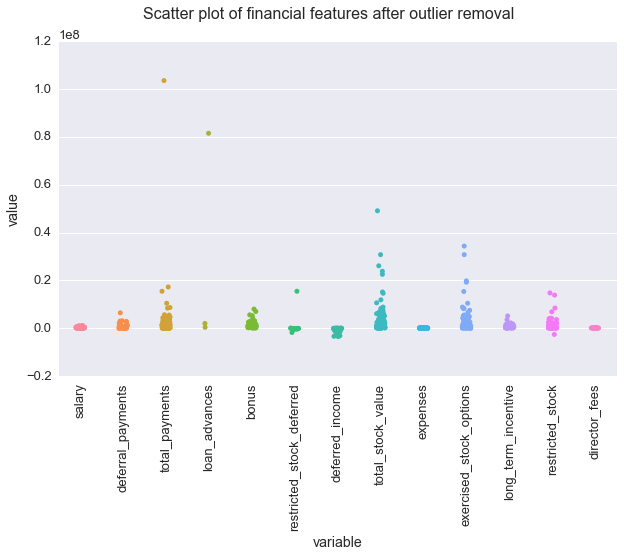

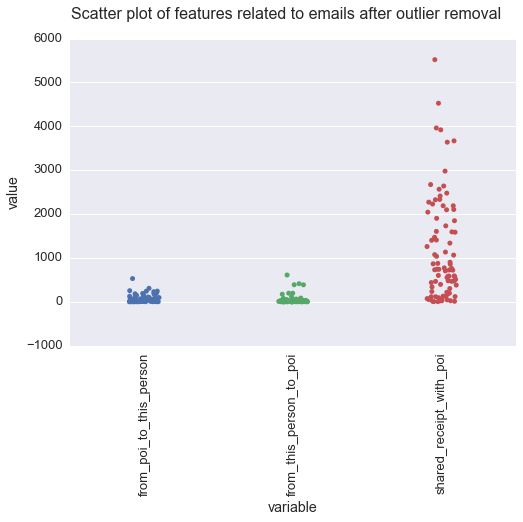

In [2]:
### Task 2: Remove outliers

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

def scatter_plot_field(fields, dataset):
    """ The function generates a scatter plot of the features
    fields = ['features'...], dataset = dictionary containing the dataset
    """
    # Convert dataset into Pandas DataFrame
    output = [[k] + [dataset[k].get(x) for x in fields] for k in dataset]  # Modified code from Reference 1
    mydata_df = pd.DataFrame(output, columns=np.append(['name'], fields))
    
    # Replace 'NaN' in the dataset to None, and remove None (or null) data
    noNaN_mydata_df = mydata_df.replace(['NaN'], [None]).dropna().reset_index(drop=True)
    mydata_long = pd.melt(mydata_df, id_vars=['name'])
    
    sns.stripplot(x='variable', y='value', data=mydata_long, jitter=True)
    
    return

# Features related to financial information
fields_finance = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus',
                 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses',
                 'exercised_stock_options', 'long_term_incentive', 'restricted_stock', 'director_fees']

# Features related to email messages
fields_email = ['from_poi_to_this_person', 'from_this_person_to_poi','shared_receipt_with_poi']

# Plot features for initial data exploration
sns.set(font_scale=1.3)
plt.figure(figsize=(10,6))
plt.suptitle('Scatter plot of financial features', fontsize=16)
plt.xticks(rotation=90)
scatter_plot_field(fields_finance, data_dict)
plt.show()

# Identification of potential outliers based on the scatter plot
for name in data_dict:    
    if (data_dict[name]['total_stock_value'] != 'NaN') & (data_dict[name]['total_stock_value'] > 4e8):
        print name

# Removal of the outlier data "TOTAL"
data_dict.pop("TOTAL", 0)

# Features plotted afater removal of the outlier "TOTAL" in the data_dict
plt.figure(figsize=(10,6))
plt.suptitle('Scatter plot of financial features after outlier removal', fontsize=16)
plt.xticks(rotation=90)
scatter_plot_field(fields_finance, data_dict)
plt.show()

plt.suptitle('Scatter plot of features related to emails after outlier removal', fontsize=16)
plt.xticks(rotation=90)
scatter_plot_field(fields_email, data_dict)
plt.show()

Reference 1: http://stackoverflow.com/questions/33440624/pythonic-way-to-flatten-a-dictionary-into-a-list-using-list-comprehension

## Data exploration

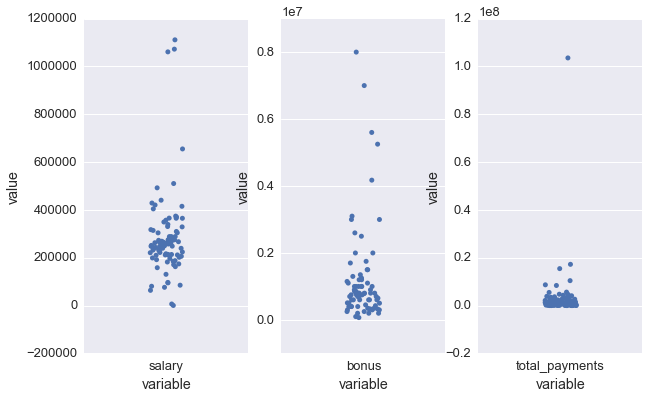

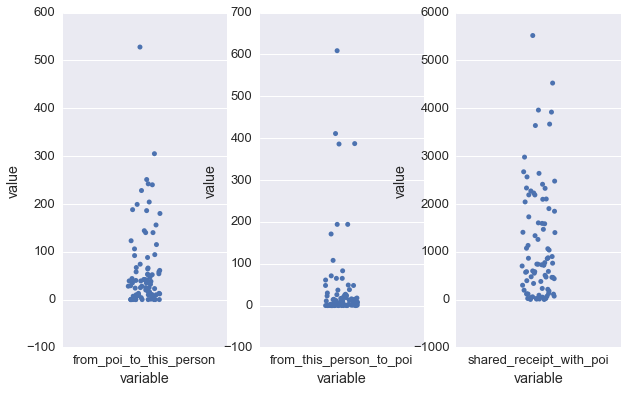

In [3]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
scatter_plot_field(['salary'], data_dict)

plt.subplot(1,3,2)
scatter_plot_field(['bonus'], data_dict)

plt.subplot(1,3,3)
scatter_plot_field(['total_payments'], data_dict)
plt.show()

plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
scatter_plot_field(['from_poi_to_this_person'], data_dict)

plt.subplot(1,3,2)
scatter_plot_field(['from_this_person_to_poi'], data_dict)

plt.subplot(1,3,3)
scatter_plot_field(['shared_receipt_with_poi'], data_dict)
plt.show()

# Task 3: Create new features
## Creating new features

In [4]:
### Task 3: Create new feature(s)

# New features, 'from_poi_to_this_person_norm' and 'from_this_person_to_poi_norm'
# are created by normalizing of number of emails to and from POIs
# 'from_poi_to_this_person' / 'to_messages'
# 'from_this_person_to_poi' / 'from_messages'

for name in data_dict:
    if (data_dict[name]['from_poi_to_this_person'] != 'NaN'):
        data_dict[name]['from_poi_to_this_person_norm'] = \
            float(data_dict[name]['from_poi_to_this_person']) / data_dict[name]['to_messages']
    else:
        data_dict[name]['from_poi_to_this_person_norm'] = 'NaN'
    
    if (data_dict[name]['from_this_person_to_poi'] != 'NaN'):
        data_dict[name]['from_this_person_to_poi_norm'] = \
            float(data_dict[name]['from_this_person_to_poi']) / data_dict[name]['from_messages']
    else:
        data_dict[name]['from_this_person_to_poi_norm'] = 'NaN'

# Update features_list with two newly created features
features_list[features_list.index('from_poi_to_this_person')] = 'from_poi_to_this_person_norm'
features_list[features_list.index('from_this_person_to_poi')] = 'from_this_person_to_poi_norm'

## Feature scaling

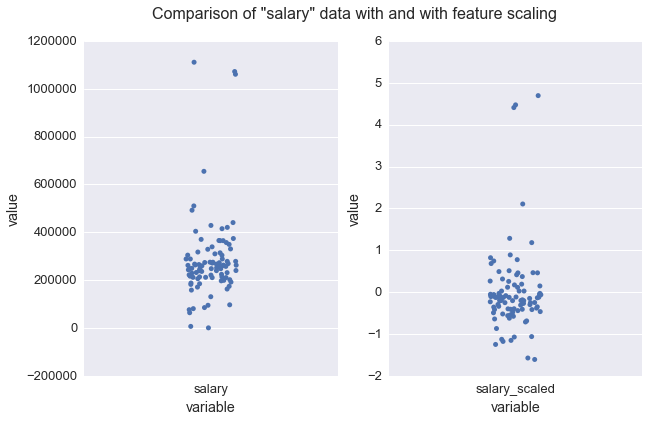

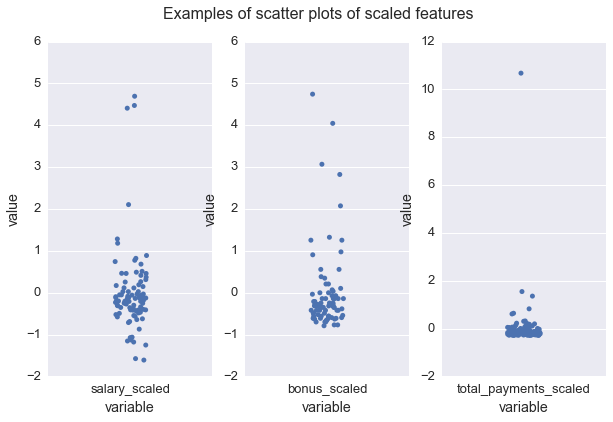

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()

# Features selected for scaling
fields = [features_list[k] for k in range(1,len(features_list))]

#my_dataset_df = pd.DataFrame(data_dict).transpose()
my_dataset_df = pd.DataFrame.from_dict(data_dict, orient='index', dtype=np.float)

# Apply feature scaling
for items in fields:
    output = [[k] + [data_dict[k].get(items)] for k in data_dict]
    mydata_df = pd.DataFrame(output, columns=np.append(['name'], [items]))    
    noNaN_mydata_df = mydata_df.replace(['NaN'], [None]).dropna().reset_index(drop = True)
    
    scaled_feature = pd.DataFrame(scaler.fit_transform(noNaN_mydata_df[[items]]), columns=[items])
    scaled_feature['name'] = noNaN_mydata_df['name']
    scaled_feature = scaled_feature.set_index('name', drop=True)
    scaled_feature.columns = [items+'_scaled']
    
    # Merge data_dict and scaled feature
    my_dataset_df = pd.concat([my_dataset_df, scaled_feature], axis=1)
    
    # Replace None to "NaN" to comply with feature/label extraction function
    my_dataset_df = my_dataset_df.replace([None], ['NaN'])

### Store to my_dataset for easy export below.
my_dataset = my_dataset_df.to_dict(orient='index')


# Plot features with and without scaling
plt.figure(figsize=(10,6))
plt.suptitle('Comparison of "salary" data with and with feature scaling', fontsize=16)

plt.subplot(1,2,1)
scatter_plot_field(['salary'], my_dataset)

plt.subplot(1,2,2)
scatter_plot_field(['salary_scaled'], my_dataset)

# Sample plots of scaled features
plt.figure(figsize=(10,6))
plt.suptitle('Examples of scatter plots of scaled features', fontsize=16)

plt.subplot(1,3,1)
scatter_plot_field(['salary_scaled'], my_dataset)

plt.subplot(1,3,2)
scatter_plot_field(['bonus_scaled'], my_dataset)

plt.subplot(1,3,3)
scatter_plot_field(['total_payments_scaled'], my_dataset)
plt.show()

## Feature selection

In [6]:
# Calculate "NaN" or missing values in features

def num_of_NaN(feature, my_dataset):
    count = 0
    for name in my_dataset:
        if my_dataset[name][feature] == 'NaN':
            count += 1
    return count

missing_fraction = []

for field in features_list:
    missing = float(num_of_NaN(field, my_dataset)) / len(my_dataset)
    missing_fraction.append(missing)

print "Table showing fraction of NaN or missing values for each feature"
missing_fraction = pd.DataFrame(missing_fraction, index=features_list, columns=['NaN_fraction'])
missing_fraction.sort_values(['NaN_fraction'], ascending=[False])

Table showing fraction of NaN or missing values for each feature


,NaN_fraction
loan_advances,0.979310
director_fees,0.889655
restricted_stock_deferred,0.882759
deferral_payments,0.737931
deferred_income,0.668966
long_term_incentive,0.551724
bonus,0.441379
shared_receipt_with_poi,0.406897
from_this_person_to_poi_norm,0.406897
from_poi_to_this_person_norm,0.406897


In [7]:
from sklearn.feature_selection import SelectKBest

### Extract features and labels from dataset for local testing
#data = featureFormat(my_dataset, features_list, sort_keys = True)
#labels, features = targetFeatureSplit(data)

# Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

selector = SelectKBest()
selector.fit(features, labels)

p_value = pd.DataFrame(selector.pvalues_, index=features_list[1:], columns=['P_value'])

print '\n'
print 'Table of P_values for unscaled features'
print p_value.sort_values(['P_value'], ascending=[True])

# Generate features_list_scaled
features_list_scaled = [features_list[k]+'_scaled' for k in range(1, len(features_list))]
features_list_scaled.insert(0, 'poi')

# Extract features_scaled and labels from dataset for local testing
data = featureFormat(my_dataset, features_list_scaled, sort_keys = True)
labels, features = targetFeatureSplit(data)

selector = SelectKBest()
selector.fit(features, labels)

p_value = pd.DataFrame(selector.pvalues_, index=features_list_scaled[1:], columns=['P_value'])

print '\n'
print 'Table of P_values for scaled features'
print p_value.sort_values(['P_value'], ascending=[True])

# Final features selected
features_list = features_list_scaled  # Scaled features will be used for the subsequent analysis

print "\n"
print "Final features selected for analysis:"
print features_list



Table of P_values for unscaled features
                               P_value
exercised_stock_options       0.000002
total_stock_value             0.000002
bonus                         0.000010
salary                        0.000030
from_this_person_to_poi_norm  0.000075
deferred_income               0.000860
long_term_incentive           0.001845
restricted_stock              0.002670
total_payments                0.003416
shared_receipt_with_poi       0.003634
loan_advances                 0.007974
expenses                      0.013673
from_poi_to_this_person_norm  0.075285
director_fees                 0.148769
deferral_payments             0.642004
restricted_stock_deferred     0.799154


Table of P_values for scaled features
                                          P_value
exercised_stock_options_scaled       2.764198e-07
total_stock_value_scaled             8.029415e-06
from_this_person_to_poi_norm_scaled  3.609467e-04
bonus_scaled                         9.302737e-04
salar

# Task 4, 5 and 6: Classifier trial, evaluation and final file generation
## Validation of algorithm

In [8]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np

def validate_clf (clf, features, labels):
    """This function calculates:
    1. averaged performance metrics (accuracy, precision (for POI) and recall (for POI)),
    2. f_scores for each feature, and
    3. confusion matrix for the given clf.
    """
    
    selector = SelectKBest(k='all')
    selector_scores_sum = 0

    folds = 1000
    accuracy = []
    precision = []
    recall = []
    cm_total = np.zeros([2,2])

    cv = StratifiedShuffleSplit(labels, n_iter=folds, test_size=0.1, random_state = 42)
    
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )

        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        
        cm = confusion_matrix(labels_test, predictions)
        cm_total += cm
        
        selector.fit(features_train, labels_train)
        selector_scores_sum += selector.scores_

        accuracy.append(accuracy_score(labels_test, predictions))
        precision.append(precision_score(labels_test, predictions, pos_label=1))
        recall.append(recall_score(labels_test, predictions, pos_label=1))

    selector_fscore_avg = selector_scores_sum/1000  # Average F_score for each feature
    
    accuracy_avg = np.mean(accuracy)
    precision_avg = np.mean(precision)
    recall_avg = np.mean(recall)
    
    print ("accuracy: {:.3f}".format(accuracy_avg))
    print ("POI precision: {:.3f}".format(precision_avg))
    print ("POI recall: {:.3f}".format(recall_avg))
    
    return selector_fscore_avg, cm_total

## Naive Bayes

In [22]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=3)
naive = GaussianNB()

steps = [('selector', selector), ('naive', naive)]

clf = Pipeline(steps)
clf.fit(features, labels)

print clf
validate_clf(clf, features, labels) # Cross-validate algorithm

Pipeline(steps=[('selector', SelectKBest(k=3, score_func=<function f_classif at 0x000000000B1CDDD8>)), ('naive', GaussianNB())])
accuracy: 0.852
POI precision: 0.359
POI recall: 0.283


(array([ 26.20713079,  19.37034405,  12.22443799,  10.61472161,
          8.62153645,   7.08717522,   6.46592684,   5.6756578 ,   5.37074992]),
 array([[ 12210.,    790.],
        [  1434.,    566.]]))

## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, min_samples_split=2)
clf.fit(features, labels)

print clf
validate_clf(clf, features, labels) # Cross-validate algorithm

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
accuracy: 0.871
POI precision: 0.304
POI recall: 0.180


(array([  8.62153645e+00,   3.81894832e-01,   7.08717522e+00,
                     nan,   1.06147216e+01,   1.90638121e-01,
          5.37074992e+00,   1.93703440e+01,   5.51640300e-01,
          2.62071308e+01,   5.67565780e+00,   6.46592684e+00,
          1.55516003e-02,   1.14140882e+00,   1.22244380e+01,
          5.27880797e+00]), array([[ 12710.,    290.],
        [  1640.,    360.]]))

## DecisionTree

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split=3)
clf.fit(features, labels)

validate_clf(clf, features, labels) # Cross-validate algorithm

print clf
print clf.feature_importances_

accuracy: 0.840
POI precision: 0.397
POI recall: 0.403
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
[ 0.          0.05351217  0.          0.          0.02751884  0.
  0.14694417  0.          0.0705655   0.29509747  0.06659292  0.          0.
  0.          0.33976894  0.        ]


## SVM

In [12]:
from sklearn.svm import SVC

clf = SVC(kernel="rbf", gamma=0.15, C=100) # gives high precision
clf.fit(features, labels)

print clf
validate_clf(clf, features, labels) # Cross-validate algorithm

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.15, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
accuracy: 0.827
POI precision: 0.187
POI recall: 0.151


(array([  8.62153645e+00,   3.81894832e-01,   7.08717522e+00,
                     nan,   1.06147216e+01,   1.90638121e-01,
          5.37074992e+00,   1.93703440e+01,   5.51640300e-01,
          2.62071308e+01,   5.67565780e+00,   6.46592684e+00,
          1.55516003e-02,   1.14140882e+00,   1.22244380e+01,
          5.27880797e+00]), array([[ 12101.,    899.],
        [  1697.,    303.]]))

## Pipeline (PCA + DecisionTree)

In [13]:
## Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

pca = PCA()
tree = DecisionTreeClassifier()

steps = [('reduce_dim', pca),
         ('tree', tree)]

param_grid = dict(reduce_dim__n_components=[2, 3, 4, 5],
                  tree__min_samples_split=[2, 3, 4, 5])

pipe = Pipeline(steps)
clf = GridSearchCV(pipe, param_grid=param_grid, cv=10)
clf.fit(features, labels)

print "Best estimator result from PCA + DecisionTree with Pipeline"
print clf.best_estimator_
print "\n"

Best estimator result from PCA + DecisionTree with Pipeline
Pipeline(steps=[('reduce_dim', PCA(copy=True, n_components=4, whiten=False)), ('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])




In [14]:
pca = PCA(n_components=4)
tree = DecisionTreeClassifier(min_samples_split=4)

steps = [('reduce_dim', pca),
         ('tree', tree)]

clf = Pipeline(steps)
clf.fit(features, labels)

print clf
validate_clf(clf, features, labels)

Pipeline(steps=[('reduce_dim', PCA(copy=True, n_components=4, whiten=False)), ('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])
accuracy: 0.807
POI precision: 0.214
POI recall: 0.219


(array([  8.62153645e+00,   3.81894832e-01,   7.08717522e+00,
                     nan,   1.06147216e+01,   1.90638121e-01,
          5.37074992e+00,   1.93703440e+01,   5.51640300e-01,
          2.62071308e+01,   5.67565780e+00,   6.46592684e+00,
          1.55516003e-02,   1.14140882e+00,   1.22244380e+01,
          5.27880797e+00]), array([[ 11664.,   1336.],
        [  1562.,    438.]]))

# Final Algorithm
## Option 1: Decision Tree + SelectKBest

In [15]:
## Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

selector = SelectKBest()
tree = DecisionTreeClassifier()

steps = [('selector', selector),
         ('tree', tree)]

param_grid = dict(selector__k=range(2,12), tree__min_samples_split=[2, 3, 4, 5, 6])
pipe = Pipeline(steps)
cv = StratifiedShuffleSplit(labels, 100, random_state = 42)

clf = GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring='precision')
clf.fit(features, labels)

print "Best estimator result from DecisionTree + SelectKBest"
print clf.best_estimator_
print "\n"

Best estimator result from DecisionTree + SelectKBest
Pipeline(steps=[('selector', SelectKBest(k=10, score_func=<function f_classif at 0x000000000B1CDDD8>)), ('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])




Pipeline(steps=[('selector', SelectKBest(k=10, score_func=<function f_classif at 0x000000000B1CDDD8>)), ('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])
accuracy: 0.854
POI precision: 0.457
POI recall: 0.467


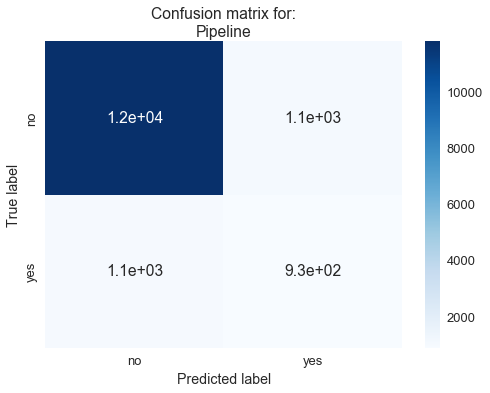



Table of F_values for scaled features
                                       F_value
exercised_stock_options_scaled       28.052141
total_stock_value_scaled             19.796811
from_this_person_to_poi_norm_scaled  11.083435
salary_scaled                         8.700313
bonus_scaled                          7.944482
total_payments_scaled                 7.508235
restricted_stock_scaled               6.517641
loan_advances_scaled                  6.340644
shared_receipt_with_poi_scaled        4.856168
long_term_incentive_scaled            3.137496
from_poi_to_this_person_norm_scaled   1.738802
deferred_income_scaled                1.721003
deferral_payments_scaled              0.434973
expenses_scaled                       0.337219
director_fees_scaled                  0.016660
restricted_stock_deferred_scaled      0.000343


In [16]:
selector = SelectKBest(k=10)
tree = DecisionTreeClassifier(min_samples_split=6)

steps = [('selector', selector),
         ('tree', tree)]

clf = Pipeline(steps)
clf.fit(features, labels)

print clf
feature_fscore, cm = validate_clf(clf, features, labels)

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(clf.__class__.__name__));
plt.show()

f_value = pd.DataFrame(selector.scores_, index=features_list_scaled[1:], columns=['F_value'])

print '\n'
print 'Table of F_values for scaled features'
print f_value.sort_values(['F_value'], ascending=[False])

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

### Compare with original features_list

In [17]:
# Extract original features_list and labels from dataset for local testing
data = featureFormat(my_dataset, features_list_original, sort_keys = True)
labels, features = targetFeatureSplit(data)

clf = Pipeline(steps)
clf.fit(features, labels)

print "Performance of algorithm using original fetures_list"
print clf

validate_clf(clf, features, labels)

Performance of algorithm using original fetures_list
Pipeline(steps=[('selector', SelectKBest(k=10, score_func=<function f_classif at 0x000000000B1CDDD8>)), ('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])
accuracy: 0.810
POI precision: 0.230
POI recall: 0.242


(array([ 16.79306968,   0.23632946,   8.08347119,          nan,
         19.28044689,   0.14374399,  10.83641744,  22.04971579,
          5.69397206,  22.61668427,   9.34981326,   8.75820503,
          1.87490141,   5.00641659,   2.43969834,   8.04296301]),
 array([[ 11667.,   1333.],
        [  1515.,    485.]]))

## Option 2: Combined Feature Selectin with Validation

In [18]:
## Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

# Extract original features_list and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

tree = DecisionTreeClassifier()
param_grid = dict(min_samples_split=[2, 3, 4, 5, 6, 7])
cv = StratifiedShuffleSplit(labels, 100, random_state = 42)

clf = GridSearchCV(tree, param_grid, cv=cv, scoring='precision')
clf.fit(features, labels)

print "Best estimator result from DecisionTree"
print clf.best_estimator_
print "\n"

Best estimator result from DecisionTree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')




In [19]:
clf = DecisionTreeClassifier(min_samples_split=6)
clf.fit(features, labels)

feature_fscore, cm = validate_clf(clf, features, labels) # Cross-validate algorithm

print clf
print clf.feature_importances_

accuracy: 0.844
POI precision: 0.401
POI recall: 0.386
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
[ 0.          0.          0.          0.          0.03268885  0.
  0.17455081  0.          0.01601946  0.29403516  0.07910384  0.          0.
  0.          0.40360188  0.        ]


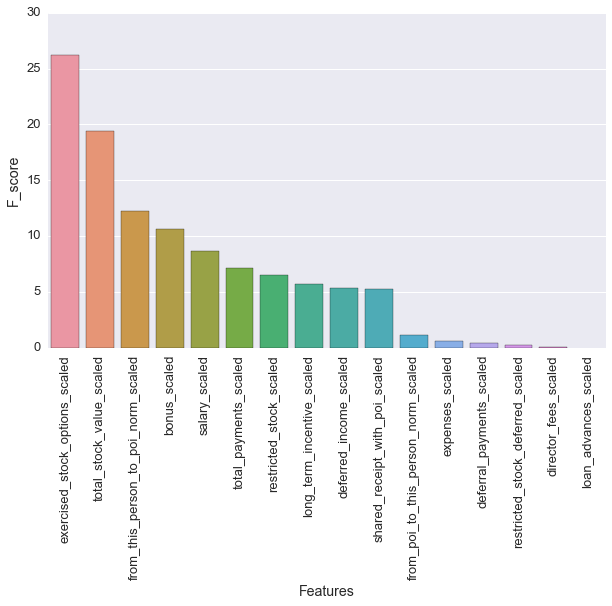

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

feature_fscore = pd.DataFrame(feature_fscore, index=features_list[1:], columns=['F_score'])
feature_fscore_sorted = feature_fscore.sort_values(['F_score'], ascending=[False])
feature_fscore_sorted

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
fig = sns.barplot(feature_fscore_sorted.index, feature_fscore_sorted.F_score)
fig.set(xlabel='Features', ylabel='F_score')

plt.show()

cutoff = feature_fscore_sorted.index.get_loc('shared_receipt_with_poi_scaled')

KBest_features_list = []

for ii in range(cutoff):
    KBest_features_list.append(feature_fscore_sorted.index[ii])

KBest_features_list.insert(0, 'poi')

accuracy: 0.854
POI precision: 0.449
POI recall: 0.460
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
[ 0.2514124   0.02395214  0.377974    0.03061318  0.          0.00794693
  0.          0.14463416  0.16346719]


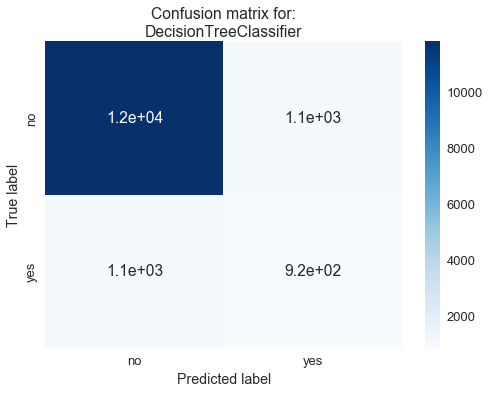

In [21]:
# Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, KBest_features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

clf = DecisionTreeClassifier(min_samples_split=6)
clf.fit(features, labels)

feature_fscore, cm = validate_clf(clf, features, labels) # Cross-validate algorithm

print clf
print clf.feature_importances_

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(clf.__class__.__name__));
plt.show()